### Data Source Link : https://data.world/johnitto/usedcarspriceprediction

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
import scipy.stats as ss
import plotly.express as px #Importing library
import pandas as pd
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.figure_factory as ff
import math
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from patsy import dmatrices
from sklearn.impute import KNNImputer
import statsmodels.stats.api as sms
import pylab 
from sklearn.preprocessing import StandardScaler
from statsmodels.compat import lzip
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

### Reading the CSV File :

In [2]:
df = pd.read_csv('train-data.csv')

#### Creating a copy of the original DataFrame

In [3]:
df1=df.copy()

#### Reading the top Five Records of the DataFrame

In [4]:
df1.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Shape of the Dataframe :

In [5]:
df1.shape

(6019, 14)

#### Checking the Datatypes of the Variables in the DataFrame :

In [6]:
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

#### We are taking only the numeric part of the Mileage

In [7]:
df1['Mileage'] = df1['Mileage'].str.split(n = 1).str[0]

##### Converting the Mileage datatype to float data type

In [8]:
df1['Mileage'] = df1['Mileage'].astype('float')
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

##### Keeping only the numeric part of the Engine 

In [9]:
df1['Engine'] = df1['Engine'].str.split(n = 1).str[0]

##### Keeping only the numeric part of the Power

In [10]:
df1['Power'] = df1['Power'].str.split(n = 1).str[0]

##### Coverting data types of Engine and Power to Float data type

In [11]:
df1['Engine'] = df1['Engine'].astype('float')
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [12]:
df1['Power']=pd.to_numeric(df1['Power'], errors='coerce')
df1.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object

#### Checking Null Values in the DataFrame :

In [13]:
df1.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

### Descriptive Statistics of the DataFrame :

In [14]:
df1.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


##### The Column Unnamed:0 has no meaning, so we are droping it

In [15]:
df1.drop(columns=df1.columns[0], axis=1,  inplace=True)
df1.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


##### As we can see, New_Price has so many missing values, we will not impute it. It's better to drop the column

In [17]:
df1 = df1.drop("New_Price", axis='columns')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


### We are creating two Column Car_Brand and Car_Model out of Name column :

In [19]:
df1['Car_Brand'] = df1['Name'].str.split(n = 1).str[0]

In [20]:
df1['Car_Model'] = df1['Name'].str.split(n = 2).str[1]

In [21]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


#### We are joining the Car_Brand and Car_Model column to make Car_Make column

In [22]:
df1["Car_Make"] = df1[["Car_Brand", "Car_Model"]].apply(lambda x: " ".join(x), axis =1)
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Make
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,Audi A4


#### We are droping the Name,Car_Brand and Car_Model Column

In [23]:
df1 = df1.drop("Name", axis='columns')

In [24]:
df1 = df1.drop("Car_Brand", axis='columns')

In [25]:
df1 = df1.drop("Car_Model", axis='columns')

In [26]:
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi A4


#### Car_Make has 216 unique values which is significantly less than the Name unique values ( 1876 - unique values )

In [27]:
df1['Car_Make'].nunique()

216

In [28]:
df['Name'].nunique()

1876

### Engine,Power and Seats has missing values 

In [29]:
df1.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Car_Make               0
dtype: int64

### We are creating car_age column and dropping the Year Column :

In [30]:
cur_year=2023

In [31]:
df1['car_age']=2023-df1['Year']

In [32]:
df1 = df1.drop("Year", axis='columns')

In [33]:
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,car_age
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti Wagon,13
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta,8
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda Jazz,12
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti Ertiga,11
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi A4,10


#### We need to encode the categorical variable. Here we have calculated the rank of the each class in the column with repect to the Price. The logic is higher the weightage of the class better is it in terms of rank.

In [34]:
car_make_mean = df1.groupby('Car_Make').Price.agg('mean')
car_make_mean = round(car_make_mean)
car_make_mean.head(50)
car_make_mean

Car_Make
Ambassador Classic     1.0
Audi A3               19.0
Audi A4               18.0
Audi A6               22.0
Audi A7               27.0
                      ... 
Volvo S60             20.0
Volvo S80              9.0
Volvo V40             20.0
Volvo XC60            18.0
Volvo XC90            24.0
Name: Price, Length: 216, dtype: float64

In [35]:
car_1=car_make_mean.to_dict()

In [36]:
car_1

{'Ambassador Classic': 1.0,
 'Audi A3': 19.0,
 'Audi A4': 18.0,
 'Audi A6': 22.0,
 'Audi A7': 27.0,
 'Audi A8': 29.0,
 'Audi Q3': 23.0,
 'Audi Q5': 31.0,
 'Audi Q7': 41.0,
 'Audi RS5': 39.0,
 'Audi TT': 31.0,
 'BMW 1': 17.0,
 'BMW 3': 18.0,
 'BMW 5': 25.0,
 'BMW 6': 46.0,
 'BMW 7': 40.0,
 'BMW X1': 20.0,
 'BMW X3': 32.0,
 'BMW X5': 38.0,
 'BMW X6': 50.0,
 'BMW Z4': 44.0,
 'Bentley Continental': 59.0,
 'Chevrolet Aveo': 1.0,
 'Chevrolet Beat': 2.0,
 'Chevrolet Captiva': 4.0,
 'Chevrolet Cruze': 6.0,
 'Chevrolet Enjoy': 4.0,
 'Chevrolet Optra': 2.0,
 'Chevrolet Sail': 3.0,
 'Chevrolet Spark': 2.0,
 'Chevrolet Tavera': 5.0,
 'Datsun GO': 3.0,
 'Datsun Redi': 3.0,
 'Datsun redi-GO': 3.0,
 'Fiat Avventura': 6.0,
 'Fiat Grande': 3.0,
 'Fiat Linea': 3.0,
 'Fiat Petra': 1.0,
 'Fiat Punto': 3.0,
 'Fiat Siena': 1.0,
 'Force One': 9.0,
 'Ford Aspire': 7.0,
 'Ford Classic': 3.0,
 'Ford EcoSport': 8.0,
 'Ford Ecosport': 7.0,
 'Ford Endeavour': 19.0,
 'Ford Fiesta': 3.0,
 'Ford Figo': 4.0,
 'Ford Fr

In [37]:
df1=df1.replace({"Car_Make": car_1})

In [38]:
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,car_age
0,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,3.0,13
1,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,12.0,8
2,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,6.0,12
3,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,7.0,11
4,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,18.0,10


In [39]:
Location_mean = df1.groupby('Location').Price.agg('mean')
Location_mean = round(Location_mean)
Location_mean.head(50)
Location_mean

Location
Ahmedabad      8.0
Bangalore     13.0
Chennai        8.0
Coimbatore    15.0
Delhi         10.0
Hyderabad     10.0
Jaipur         6.0
Kochi         11.0
Kolkata        6.0
Mumbai         9.0
Pune           7.0
Name: Price, dtype: float64

### We can observe that Coimbatore has got highest rank. Jaipur and Kolkata has got lowest rank jointly.

In [40]:
Location_1=Location_mean.to_dict()

In [41]:
Location_1

{'Ahmedabad': 8.0,
 'Bangalore': 13.0,
 'Chennai': 8.0,
 'Coimbatore': 15.0,
 'Delhi': 10.0,
 'Hyderabad': 10.0,
 'Jaipur': 6.0,
 'Kochi': 11.0,
 'Kolkata': 6.0,
 'Mumbai': 9.0,
 'Pune': 7.0}

In [42]:
df1=df1.replace({"Location": Location_1})

In [43]:
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,car_age
0,9.0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,3.0,13
1,7.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,12.0,8
2,8.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,6.0,12
3,8.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,7.0,11
4,15.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,18.0,10


In [44]:
Fuel_Type_Mean = df1.groupby('Fuel_Type').Price.agg('mean')
Fuel_Type_Mean = round(Fuel_Type_Mean)
Fuel_Type_Mean.head(50)
Fuel_Type_Mean

Fuel_Type
CNG          4.0
Diesel      13.0
Electric    13.0
LPG          2.0
Petrol       6.0
Name: Price, dtype: float64

#### We can observe that Diesel and Electric has got highest rank. Lpg has got lowest rank.

In [45]:
Fuel_Type_Mean_1=Fuel_Type_Mean.to_dict()

In [46]:
df1=df1.replace({"Fuel_Type": Fuel_Type_Mean_1})

In [47]:
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,car_age
0,9.0,72000,4.0,Manual,First,26.60,998.0,58.16,5.0,1.75,3.0,13
1,7.0,41000,13.0,Manual,First,19.67,1582.0,126.20,5.0,12.50,12.0,8
2,8.0,46000,6.0,Manual,First,18.20,1199.0,88.70,5.0,4.50,6.0,12
3,8.0,87000,13.0,Manual,First,20.77,1248.0,88.76,7.0,6.00,7.0,11
4,15.0,40670,13.0,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,18.0,10


In [48]:
Transmission_Mean = df1.groupby('Transmission').Price.agg('mean')
Transmission_Mean = round(Transmission_Mean)
Transmission_Mean.head(50)
Transmission_Mean

Transmission
Automatic    20.0
Manual        5.0
Name: Price, dtype: float64

#### We can observe that Automatic has got better rank than manual.

In [49]:
Transmission_Mean_1=Transmission_Mean.to_dict()

In [50]:
df1=df1.replace({"Transmission": Transmission_Mean_1})

In [51]:
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,car_age
0,9.0,72000,4.0,5.0,First,26.60,998.0,58.16,5.0,1.75,3.0,13
1,7.0,41000,13.0,5.0,First,19.67,1582.0,126.20,5.0,12.50,12.0,8
2,8.0,46000,6.0,5.0,First,18.20,1199.0,88.70,5.0,4.50,6.0,12
3,8.0,87000,13.0,5.0,First,20.77,1248.0,88.76,7.0,6.00,7.0,11
4,15.0,40670,13.0,20.0,Second,15.20,1968.0,140.80,5.0,17.74,18.0,10


In [52]:
Owner_Type_mean = df1.groupby('Owner_Type').Price.agg('mean')
Owner_Type_mean = round(Owner_Type_mean)
Owner_Type_mean.head(50)
Owner_Type_mean

Owner_Type
First             10.0
Fourth & Above     3.0
Second             8.0
Third              5.0
Name: Price, dtype: float64

#### We can observe that First owner has got highest rank. Fourth and above has got lowest rank.

In [53]:
Owner_Type_mean_1=Owner_Type_mean.to_dict()

In [54]:
df1=df1.replace({"Owner_Type": Owner_Type_mean_1})

In [55]:
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,car_age
0,9.0,72000,4.0,5.0,10.0,26.60,998.0,58.16,5.0,1.75,3.0,13
1,7.0,41000,13.0,5.0,10.0,19.67,1582.0,126.20,5.0,12.50,12.0,8
2,8.0,46000,6.0,5.0,10.0,18.20,1199.0,88.70,5.0,4.50,6.0,12
3,8.0,87000,13.0,5.0,10.0,20.77,1248.0,88.76,7.0,6.00,7.0,11
4,15.0,40670,13.0,20.0,8.0,15.20,1968.0,140.80,5.0,17.74,18.0,10


In [56]:
df1.duplicated().value_counts()

False    6017
True        2
dtype: int64

In [57]:
df1['Price'].skew()

3.3352319876668415

##### The Traget Variable 'Price' has skewness

### Distribution Plot of the Target

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\426642906.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Price'])


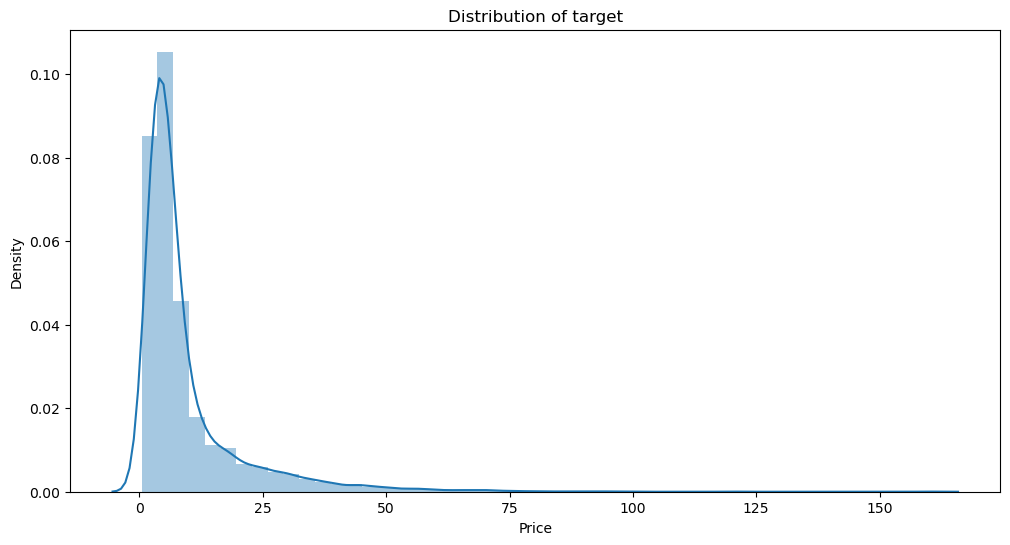

In [58]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target')
sns.distplot(df1['Price'])
plt.show()

#### We are doing boxcox transformation of the Target Variable, to reduce the skewness

In [59]:
df1['Price'] = ss.boxcox(df1['Price'])[0]

In [60]:
df1['Price'].skew()

-0.004812698339470734

### We can see, skewness has been reduced significanltly.

#### Distribution Plot of the Target after box-cox transformation :

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\3463278149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Price'])


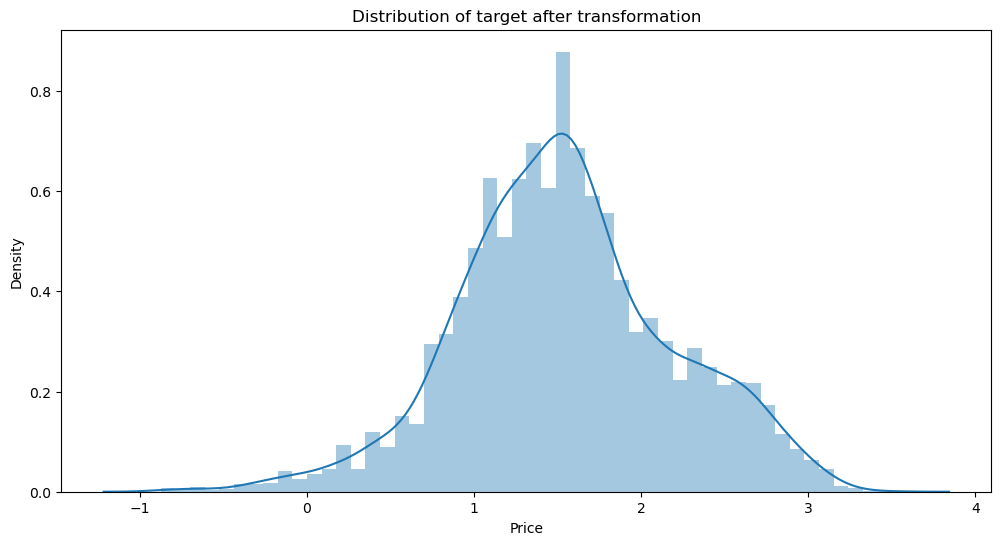

In [61]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of target after transformation')
sns.distplot(df1['Price'])
plt.show()

In [62]:
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Make,car_age
0,9.0,72000,4.0,5.0,10.0,26.60,998.0,58.16,5.0,0.535809,3.0,13
1,7.0,41000,13.0,5.0,10.0,19.67,1582.0,126.20,5.0,2.086280,12.0,8
2,8.0,46000,6.0,5.0,10.0,18.20,1199.0,88.70,5.0,1.340157,6.0,12
3,8.0,87000,13.0,5.0,10.0,20.77,1248.0,88.76,7.0,1.562457,7.0,11
4,15.0,40670,13.0,20.0,8.0,15.20,1968.0,140.80,5.0,2.315717,18.0,10


In [63]:
df1.isnull().sum()

Location               0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Car_Make               0
car_age                0
dtype: int64

#### We are imputing the Mileage,Engine,Power and Seats with KNNimputation.

In [64]:
imputer=KNNImputer(n_neighbors=3)
df_i=imputer.fit_transform(df1[['Mileage','Engine','Power','Seats']])
df_i

array([[  26.6 ,  998.  ,   58.16,    5.  ],
       [  19.67, 1582.  ,  126.2 ,    5.  ],
       [  18.2 , 1199.  ,   88.7 ,    5.  ],
       ...,
       [  14.  , 2498.  ,  112.  ,    8.  ],
       [  18.9 ,  998.  ,   67.1 ,    5.  ],
       [  25.44,  936.  ,   57.6 ,    5.  ]])

#### We are creating Imputed DataFrame with Mileage,Engine,Power and Seats Column

In [65]:
df_imp=pd.DataFrame(df_i,columns=['Mileage','Engine','Power','Seats'])
df_imp

,Mileage,Engine,Power,Seats
0,26.60,998.0,58.16,5.0
1,19.67,1582.0,126.20,5.0
2,18.20,1199.0,88.70,5.0
3,20.77,1248.0,88.76,7.0
4,15.20,1968.0,140.80,5.0
...,...,...,...,...
6014,28.40,1248.0,74.00,5.0
6015,24.40,1120.0,71.00,5.0
6016,14.00,2498.0,112.00,8.0
6017,18.90,998.0,67.10,5.0


In [66]:
df_imp.isnull().sum()

Mileage    0
Engine     0
Power      0
Seats      0
dtype: int64

##### We can observe that there are no missing value present in the Imputed DataFrame after imputation

In [67]:
df1 = df1.drop(["Mileage","Engine","Power","Seats"],axis='columns')

In [68]:
df5 = pd.concat([df_imp,df1],axis=1)

In [69]:
df5.head()

,Mileage,Engine,Power,Seats,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,Car_Make,car_age
0,26.60,998.0,58.16,5.0,9.0,72000,4.0,5.0,10.0,0.535809,3.0,13
1,19.67,1582.0,126.20,5.0,7.0,41000,13.0,5.0,10.0,2.086280,12.0,8
2,18.20,1199.0,88.70,5.0,8.0,46000,6.0,5.0,10.0,1.340157,6.0,12
3,20.77,1248.0,88.76,7.0,8.0,87000,13.0,5.0,10.0,1.562457,7.0,11
4,15.20,1968.0,140.80,5.0,15.0,40670,13.0,20.0,8.0,2.315717,18.0,10


In [70]:
df6=df5.copy()

In [71]:
df5.describe()

,Mileage,Engine,Power,Seats,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,Car_Make,car_age
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,18.135376,1620.908014,112.774210,5.277012,9.505067,5.873838e+04,9.704436,9.286426,9.574016,1.543289,9.485629,9.641801
std,4.582897,600.555615,53.826086,0.807254,2.664545,9.126884e+04,3.528576,6.777210,1.002305,0.647552,9.745409,3.269742
min,0.000000,72.000000,34.200000,0.000000,6.000000,1.710000e+02,2.000000,5.000000,3.000000,-0.876058,1.000000,4.000000
25%,15.170000,1198.000000,74.000000,5.000000,7.000000,3.400000e+04,6.000000,5.000000,10.000000,1.137597,4.000000,7.000000
50%,18.150000,1493.000000,93.700000,5.000000,9.000000,5.300000e+04,13.000000,5.000000,10.000000,1.515485,6.000000,9.000000
75%,21.100000,1984.000000,138.100000,5.000000,11.000000,7.300000e+04,13.000000,20.000000,10.000000,1.929845,10.000000,12.000000
max,33.540000,5998.000000,560.000000,10.000000,15.000000,6.500000e+06,13.000000,20.000000,10.000000,3.502082,120.000000,25.000000


In [72]:
b,a = dmatrices('Price ~ Location+Kilometers_Driven+Fuel_Type+Transmission+Owner_Type+Mileage+Engine+Power+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

,VIF,variable
0,343.171533,Intercept
1,1.102717,Location
2,1.053798,Kilometers_Driven
3,1.806759,Fuel_Type
4,1.873664,Transmission
5,1.189304,Owner_Type
6,2.452843,Mileage
7,8.498551,Engine
8,8.412876,Power
9,1.834580,Seats


In [73]:
mod = sm.OLS(b,a)
first = mod.fit()
first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     4104.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:02   Log-Likelihood:                 521.46
No. Observations:                6019   AIC:                            -1019.
Df Residuals:                    6007   BIC:                            -938.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8873      0.053     16.731      0.000       0.783       0.991
Location              0.0202      0.001     17.868      0.000       0.018       0.022
Kilometers_Driven -3.964e-08   3.22e-08     -1.231      0.218   -1.03e-07    2.35e-08
Fuel_Type             0.0278      0.001     25.480      0.000       0.026       0.030
Transmission          0.0128      0.001     22.135      0.000       0.012       0.014
Owner_Type            0.0240      0.003      7.713      0.000       0.018       0.030
Mileage              -0.0073      0.001     -7.500      0.000      -0.009      -0.005
Engine             9.043e-05   1.39e-05      6.507      0.000    6.32e-05       0.000
Power                 0.0032      0.000     20.736      0.000       0.003       0.004
Seats                 0.0333      0.005      6.924      0.000       0.024       0.043
Car_Make              0.0167      0.001     29.050      0.000       0.016       0.018
car_age              -0.0892      0.001    -81.030      0.000      -0.091      -0.087
==============================================================================
Omnibus:                     1753.878   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14237.038
Skew:                          -1.164   Prob(JB):                         0.00
Kurtosis:                      10.166   Cond. No.                     2.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_first = sms.het_breuschpagan(first.resid, first.model.exog)
lzip(names, test_result_first)

[('Lagrange multiplier statistic', 314.52798287059824),
 ('p-value', 7.579089593949099e-61),
 ('f-value', 30.109863206370548),
 ('f p-value', 1.470619879451298e-62)]

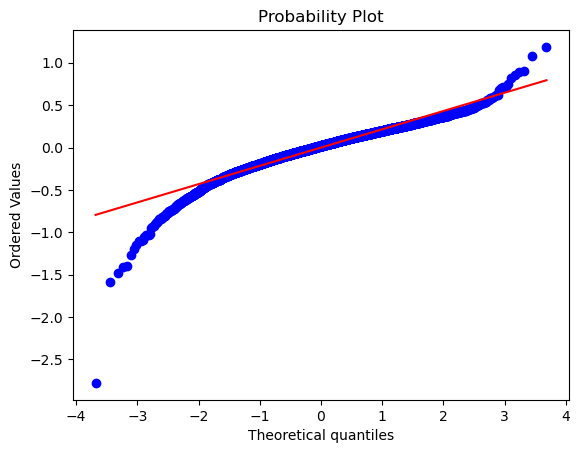

In [75]:
ss.probplot(first.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\1422869367.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(first.resid)


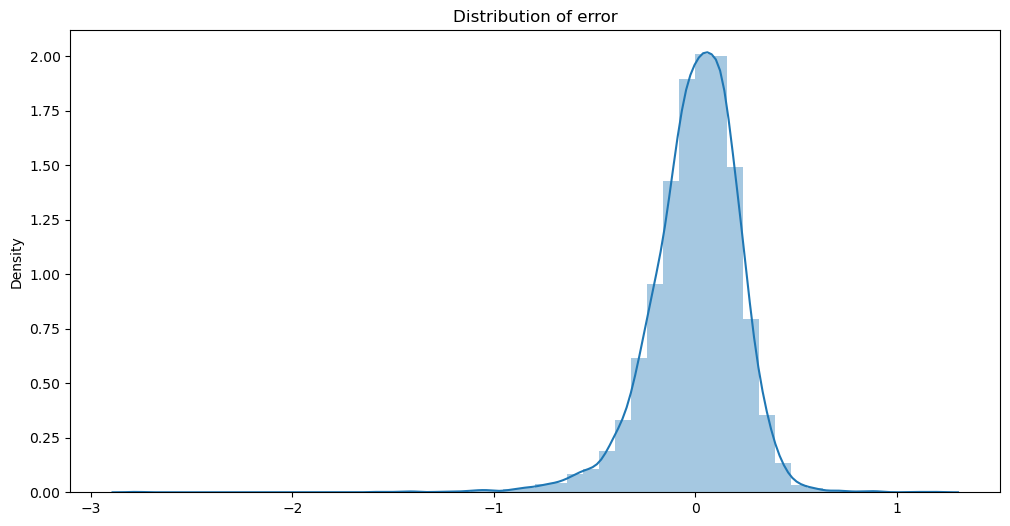

In [76]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(first.resid)
plt.show()

In [77]:
s,t = dmatrices('Price ~ Location+Kilometers_Driven+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

In [78]:
mod = sm.OLS(s,t)
second = mod.fit()
second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3984.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:03   Log-Likelihood:                -82.443
No. Observations:                6019   AIC:                             184.9
Df Residuals:                    6009   BIC:                             251.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2472      0.058     21.666      0.000       1.134       1.360
Location              0.0210      0.001     16.843      0.000       0.019       0.023
Kilometers_Driven -1.693e-08   3.56e-08     -0.476      0.634   -8.66e-08    5.28e-08
Fuel_Type             0.0352      0.001     31.816      0.000       0.033       0.037
Transmission          0.0179      0.001     29.047      0.000       0.017       0.019
Owner_Type            0.0257      0.003      7.475      0.000       0.019       0.032
Mileage              -0.0185      0.001    -18.953      0.000      -0.020      -0.017
Seats                 0.0451      0.005      9.545      0.000       0.036       0.054
Car_Make              0.0304      0.000     63.810      0.000       0.029       0.031
car_age              -0.0878      0.001    -72.419      0.000      -0.090      -0.085
==============================================================================
Omnibus:                     1106.383   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4258.808
Skew:                          -0.876   Prob(JB):                         0.00
Kurtosis:                       6.730   Cond. No.                     1.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
s,t = dmatrices('Price ~ Location+Kilometers_Driven+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(t.values, i) for i in range(t.shape[1])]
vif['variable'] = t.columns

vif

,VIF,variable
0,330.887350,Intercept
1,1.102154,Location
2,1.051837,Kilometers_Driven
3,1.520027,Fuel_Type
4,1.738351,Transmission
5,1.189035,Owner_Type
6,2.006304,Mileage
7,1.451375,Seats
8,2.153538,Car_Make
9,1.569087,car_age


C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\3044292421.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(second.resid)


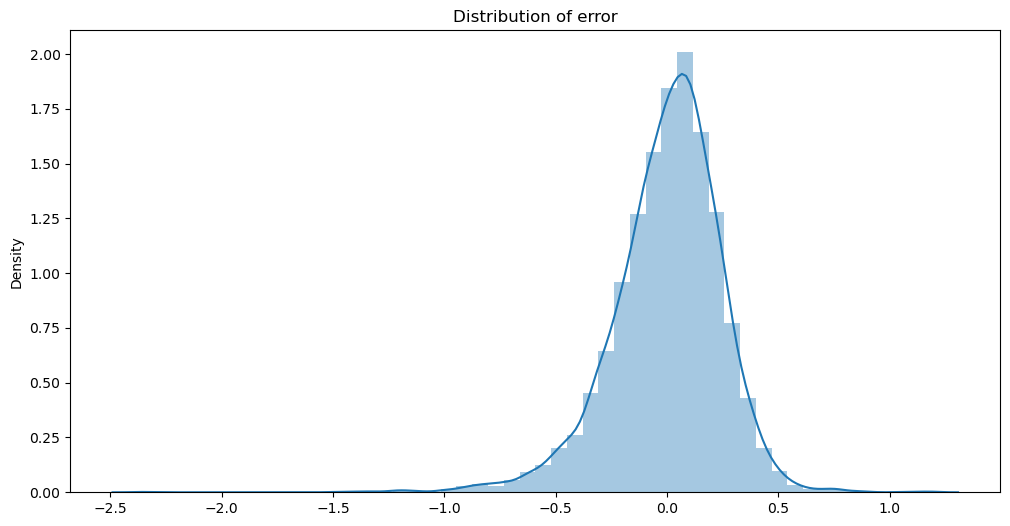

In [80]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(second.resid)
plt.show()

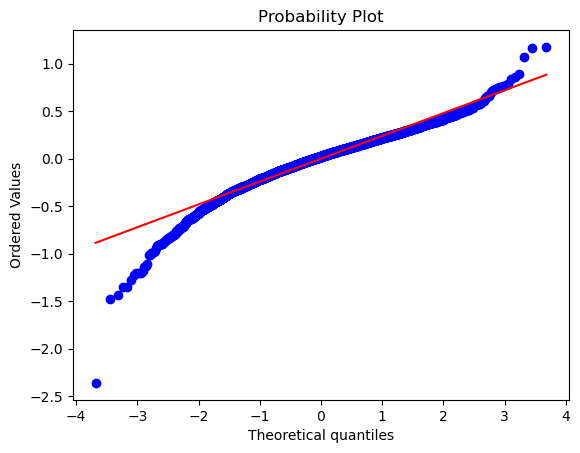

In [81]:
ss.probplot(second.resid, dist="norm", plot=pylab)
pylab.show()

In [82]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_sec = sms.het_breuschpagan(second.resid, second.model.exog)
lzip(names, test_result_sec)

[('Lagrange multiplier statistic', 392.1197661122233),
 ('p-value', 6.57314724597962e-79),
 ('f-value', 46.5276114457784),
 ('f p-value', 1.1532919965573055e-81)]

In [83]:
u,v = dmatrices('Price ~ Location+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

In [84]:
mod = sm.OLS(u,v)
third = mod.fit()
third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     4483.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:05   Log-Likelihood:                -82.556
No. Observations:                6019   AIC:                             183.1
Df Residuals:                    6010   BIC:                             243.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2474      0.058     21.672      0.000       1.135       1.360
Location         0.0210      0.001     16.851      0.000       0.019       0.023
Fuel_Type        0.0351      0.001     31.923      0.000       0.033       0.037
Transmission     0.0179      0.001     29.067      0.000       0.017       0.019
Owner_Type       0.0258      0.003      7.485      0.000       0.019       0.033
Mileage         -0.0185      0.001    -18.950      0.000      -0.020      -0.017
Seats            0.0450      0.005      9.535      0.000       0.036       0.054
Car_Make         0.0304      0.000     63.812      0.000       0.029       0.031
car_age         -0.0879      0.001    -73.211      0.000      -0.090      -0.086
==============================================================================
Omnibus:                     1106.186   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4259.028
Skew:                          -0.876   Prob(JB):                         0.00
Kurtosis:                       6.730   Cond. No.                         555.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_third = sms.het_breuschpagan(third.resid, second.model.exog)
lzip(names, test_result_third)

[('Lagrange multiplier statistic', 391.64570377032936),
 ('p-value', 8.296317380385897e-79),
 ('f-value', 46.46744594095563),
 ('f p-value', 1.479235658916269e-81)]

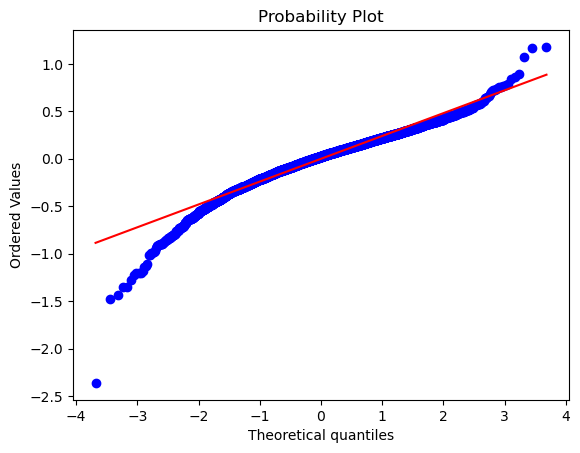

In [86]:
ss.probplot(third.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\3882168392.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(third.resid)


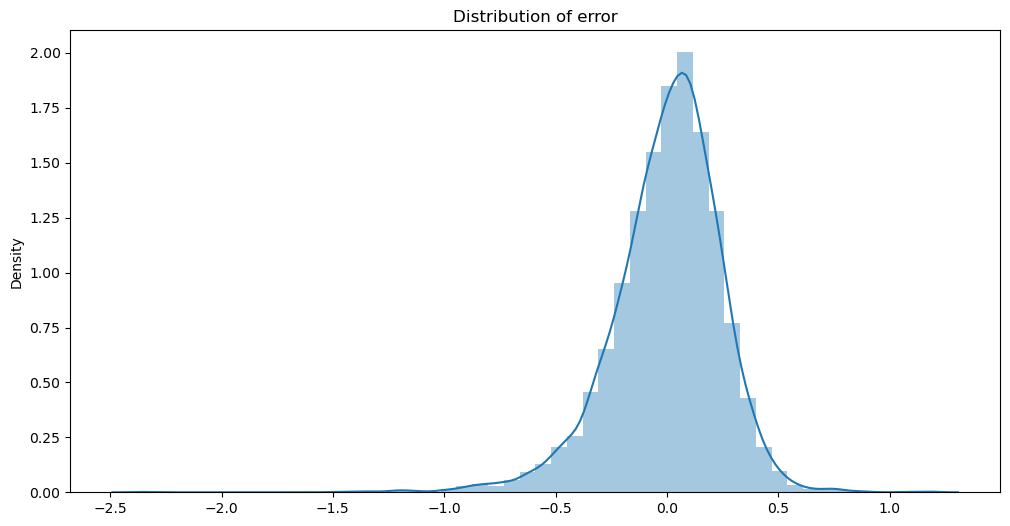

In [87]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(third.resid)
plt.show()

In [88]:
u,v = dmatrices('Price ~ Location+Fuel_Type+Transmission+Owner_Type+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]
vif['variable'] = v.columns

vif

,VIF,variable
0,330.864845,Intercept
1,1.101991,Location
2,1.505643,Fuel_Type
3,1.737442,Transmission
4,1.188666,Owner_Type
5,2.006076,Mileage
6,1.449442,Seats
7,2.153501,Car_Make
8,1.538349,car_age


In [89]:
g,h = dmatrices('Price ~ Location+Fuel_Type+Transmission+Mileage+Seats+Car_Make+car_age',data=df5,return_type='dataframe')

In [90]:
mod = sm.OLS(g,h)
fourth = mod.fit()
fourth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     5069.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:06   Log-Likelihood:                -110.48
No. Observations:                6019   AIC:                             237.0
Df Residuals:                    6011   BIC:                             290.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5273      0.044     34.739      0.000       1.441       1.613
Location         0.0209      0.001     16.682      0.000       0.018       0.023
Fuel_Type        0.0352      0.001     31.848      0.000       0.033       0.037
Transmission     0.0179      0.001     28.871      0.000       0.017       0.019
Mileage         -0.0185      0.001    -18.790      0.000      -0.020      -0.017
Seats            0.0444      0.005      9.375      0.000       0.035       0.054
Car_Make         0.0304      0.000     63.411      0.000       0.029       0.031
car_age         -0.0910      0.001    -80.550      0.000      -0.093      -0.089
==============================================================================
Omnibus:                     1141.736   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4532.418
Skew:                          -0.895   Prob(JB):                         0.00
Kurtosis:                       6.856   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_fourth = sms.het_breuschpagan(fourth.resid, fourth.model.exog)
lzip(names, test_result_fourth)

[('Lagrange multiplier statistic', 379.98835808942505),
 ('p-value', 4.651284754766637e-78),
 ('f-value', 57.86500404988512),
 ('f p-value', 1.1481649821404745e-80)]

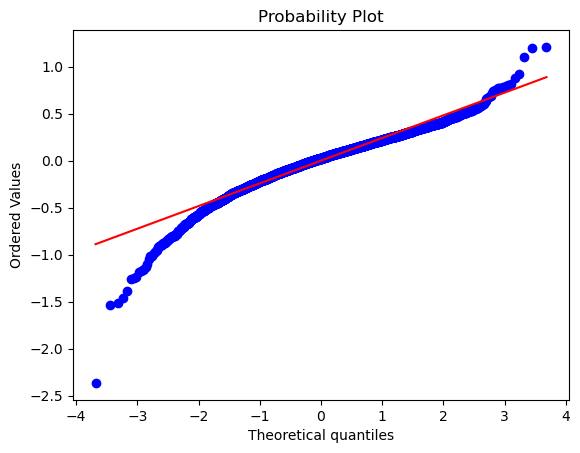

In [92]:
ss.probplot(fourth.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\2682134316.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fourth.resid)


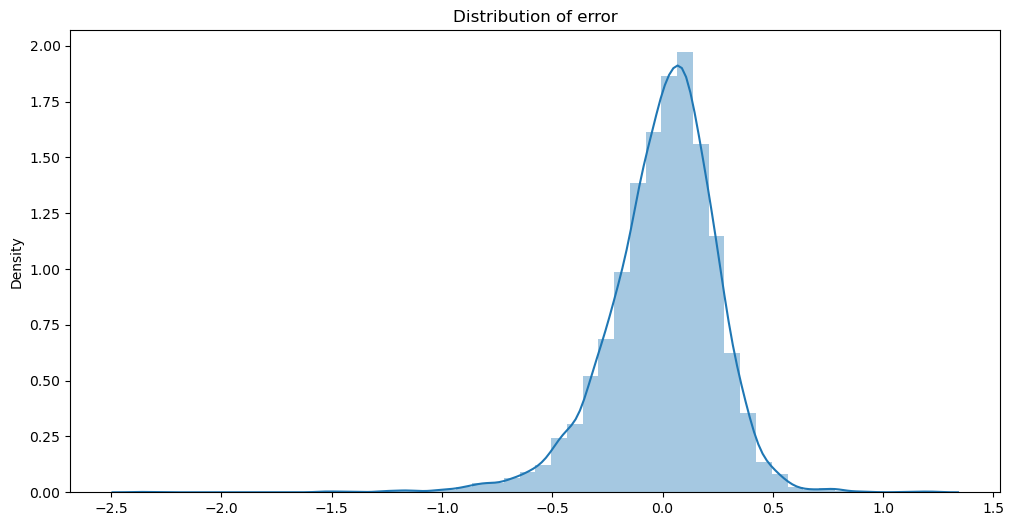

In [93]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fourth.resid)
plt.show()

In [94]:
j,k = dmatrices('Price ~ Location+Fuel_Type+Transmission+Mileage+Car_Make+car_age',data=df5,return_type='dataframe')

In [95]:
mod = sm.OLS(j,k)
fifth = mod.fit()
fifth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     5815.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:07   Log-Likelihood:                -154.17
No. Observations:                6019   AIC:                             322.3
Df Residuals:                    6012   BIC:                             369.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8352      0.029     62.367      0.000       1.778       1.893
Location         0.0208      0.001     16.482      0.000       0.018       0.023
Fuel_Type        0.0397      0.001     39.533      0.000       0.038       0.042
Transmission     0.0167      0.001     27.360      0.000       0.016       0.018
Mileage         -0.0228      0.001    -26.155      0.000      -0.025      -0.021
Car_Make         0.0296      0.000     62.272      0.000       0.029       0.031
car_age         -0.0930      0.001    -83.274      0.000      -0.095      -0.091
==============================================================================
Omnibus:                     1211.737   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4857.758
Skew:                          -0.948   Prob(JB):                         0.00
Kurtosis:                       6.972   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_fourth = sms.het_breuschpagan(fifth.resid, fourth.model.exog)
lzip(names, test_result_fourth)

[('Lagrange multiplier statistic', 411.70129454466945),
 ('p-value', 7.375387741966384e-85),
 ('f-value', 63.04885857580943),
 ('f p-value', 6.098507754963067e-88)]

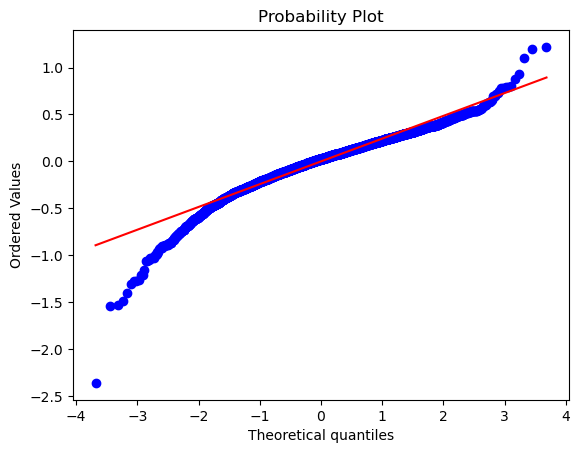

In [97]:
ss.probplot(fifth.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\1474514813.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fifth.resid)


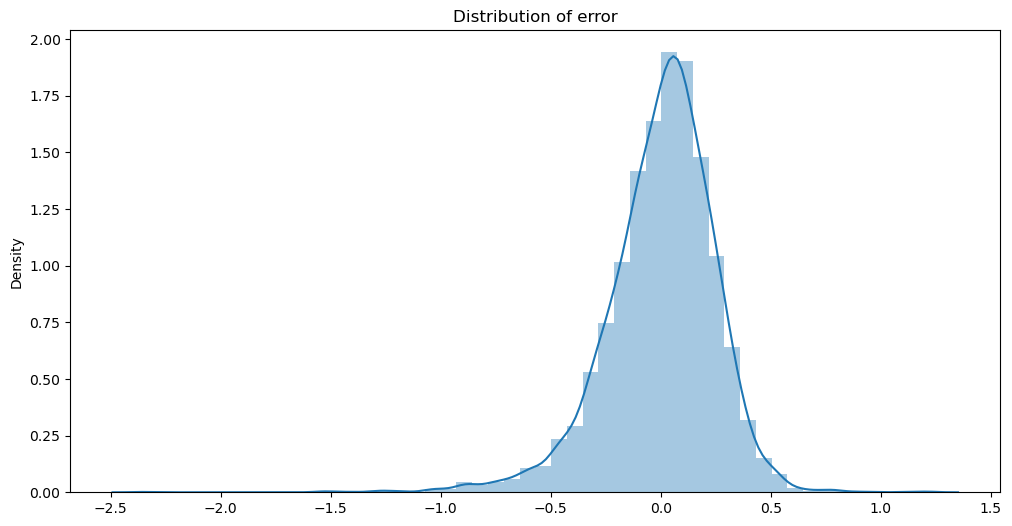

In [98]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fifth.resid)
plt.show()

In [99]:
m,n = dmatrices('Price ~ Fuel_Type+Transmission+Mileage+Car_Make+car_age',data=df5,return_type='dataframe')

In [100]:
mod = sm.OLS(m,n)
sixth = mod.fit()
sixth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     6625.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:08   Log-Likelihood:                -287.16
No. Observations:                6019   AIC:                             586.3
Df Residuals:                    6013   BIC:                             626.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0961      0.025     82.660      0.000       2.046       2.146
Fuel_Type        0.0396      0.001     38.602      0.000       0.038       0.042
Transmission     0.0171      0.001     27.476      0.000       0.016       0.018
Mileage         -0.0242      0.001    -27.275      0.000      -0.026      -0.022
Car_Make         0.0300      0.000     61.649      0.000       0.029       0.031
car_age         -0.0977      0.001    -88.311      0.000      -0.100      -0.095
==============================================================================
Omnibus:                     1216.787   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4732.454
Skew:                          -0.961   Prob(JB):                         0.00
Kurtosis:                       6.895   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_fifth = sms.het_breuschpagan(sixth.resid, fifth.model.exog)
lzip(names, test_result_fifth)

[('Lagrange multiplier statistic', 356.3085740409424),
 ('p-value', 6.823609491577257e-74),
 ('f-value', 63.047968595349985),
 ('f p-value', 3.477174917097395e-76)]

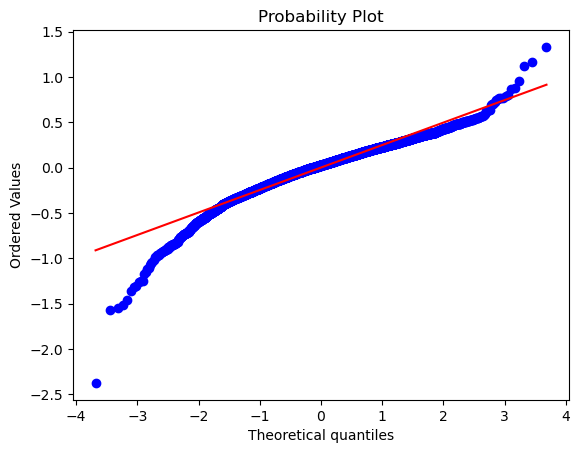

In [102]:
ss.probplot(sixth.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\2350550924.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sixth.resid)


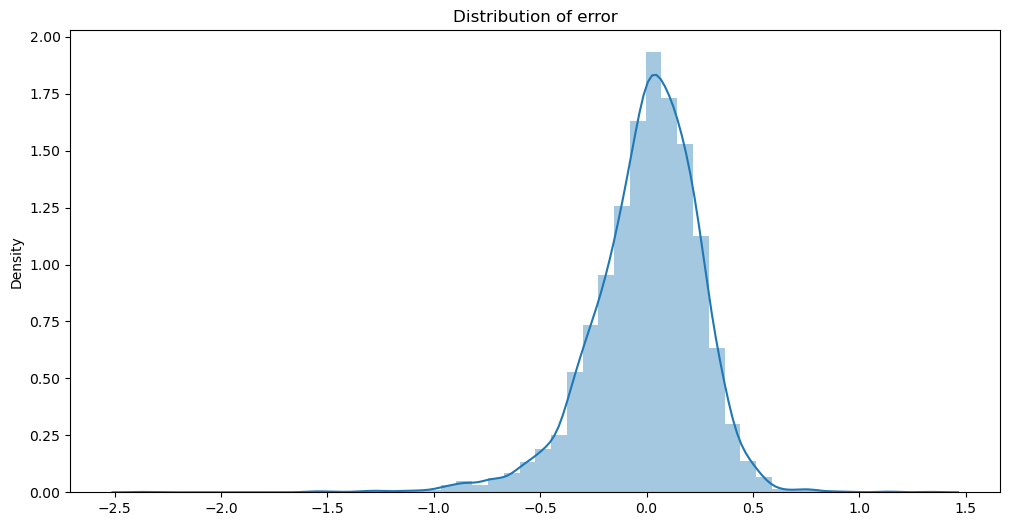

In [103]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(sixth.resid)
plt.show()

In [104]:
p,q = dmatrices('Price ~ Fuel_Type+Mileage+Car_Make+car_age',data=df5,return_type='dataframe')

In [105]:
mod = sm.OLS(p,q)
sixth = mod.fit()
sixth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     7191.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:09   Log-Likelihood:                -643.09
No. Observations:                6019   AIC:                             1296.
Df Residuals:                    6014   BIC:                             1330.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2876      0.026     88.444      0.000       2.237       2.338
Fuel_Type      0.0381      0.001     35.058      0.000       0.036       0.040
Mileage       -0.0273      0.001    -29.296      0.000      -0.029      -0.026
Car_Make       0.0368      0.000     83.338      0.000       0.036       0.038
car_age       -0.1003      0.001    -85.887      0.000      -0.103      -0.098
==============================================================================
Omnibus:                     1302.433   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5665.922
Skew:                          -0.996   Prob(JB):                         0.00
Kurtosis:                       7.316   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_sixth = sms.het_breuschpagan(sixth.resid, sixth.model.exog)
lzip(names, test_result_sixth)

[('Lagrange multiplier statistic', 521.3283393864624),
 ('p-value', 1.6320510155850134e-111),
 ('f-value', 142.57256647081624),
 ('f p-value', 1.2744776075639547e-116)]

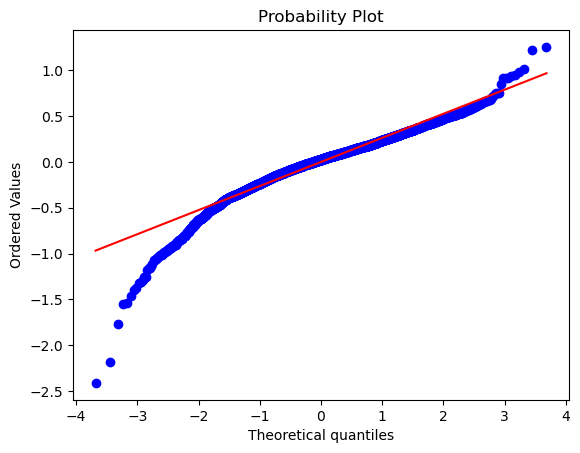

In [107]:
ss.probplot(sixth.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\2350550924.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sixth.resid)


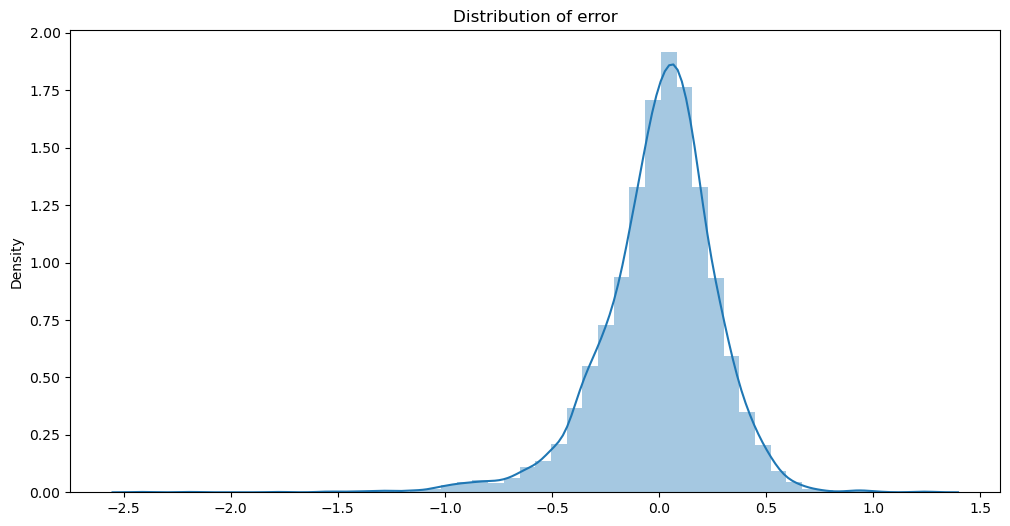

In [108]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(sixth.resid)
plt.show()

In [109]:
e,f = dmatrices('Price ~ Car_Make+car_age',data=df5,return_type='dataframe')

In [110]:
mod = sm.OLS(e,f)
seventh = mod.fit()
seventh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.061e+04
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:51:10   Log-Likelihood:                -1379.1
No. Observations:                6019   AIC:                             2764.
Df Residuals:                    6016   BIC:                             2784.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9621      0.013    147.826      0.000       1.936       1.988
Car_Make       0.0470      0.000    115.940      0.000       0.046       0.048
car_age       -0.0897      0.001    -74.231      0.000      -0.092      -0.087
==============================================================================
Omnibus:                     1592.719   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9389.628
Skew:                          -1.134   Prob(JB):                         0.00
Kurtosis:                       8.683   Cond. No.                         52.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result_sev = sms.het_breuschpagan(seventh.resid, seventh.model.exog)
lzip(names, test_result_sev)

[('Lagrange multiplier statistic', 663.6368027920681),
 ('p-value', 7.818065051752012e-145),
 ('f-value', 372.75146974892175),
 ('f p-value', 2.442732523752183e-153)]

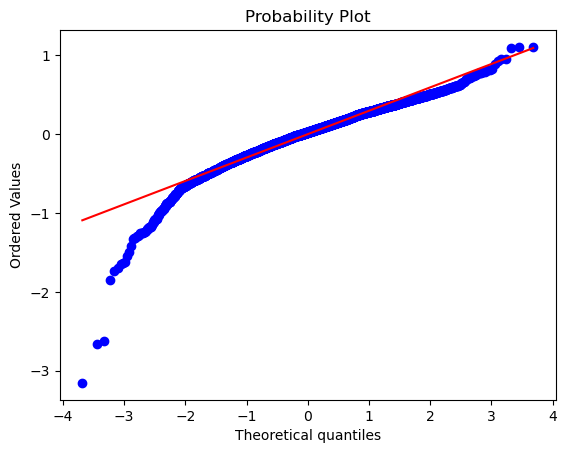

In [112]:
ss.probplot(seventh.resid, dist="norm", plot=pylab)
pylab.show()

C:\Users\ramit\AppData\Local\Temp\ipykernel_21968\1312681104.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seventh.resid)


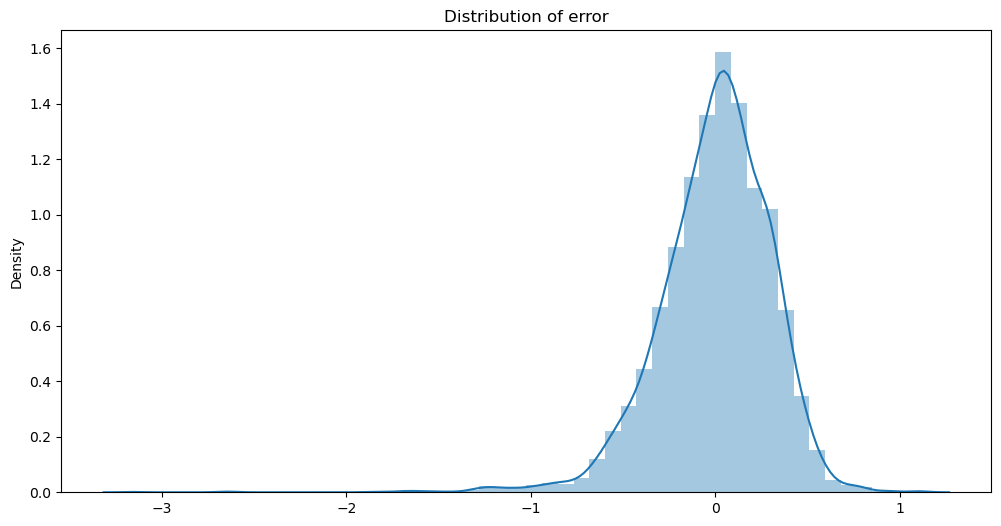

In [113]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(seventh.resid)
plt.show()

In [114]:
X = df6.drop(['Price'],axis=1)
y = df6['Price']

In [115]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X,y)
rfr_model.feature_importances_

array([0.0096417 , 0.01789746, 0.02963427, 0.0032117 , 0.0183153 ,
       0.01768967, 0.00135203, 0.0022851 , 0.00284782, 0.74912038,
       0.14800457])

<AxesSubplot:>

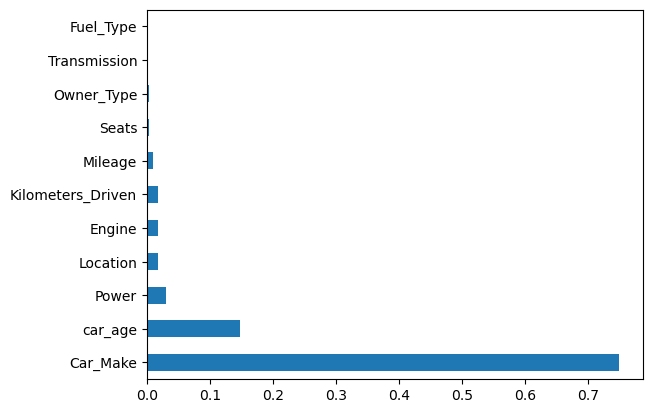

In [116]:
feature_imp = pd.Series(rfr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [118]:
model = LinearRegression()

In [119]:
model.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred = model.predict(X_test)

In [121]:
y_pred_train=model.predict(X_train)

In [122]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.8761888337257928

In [123]:
r2 = metrics.r2_score(y_train, y_pred_train)
r2

0.8838765993034703

In [124]:
scaler = StandardScaler()

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [126]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [127]:
X_train.head()

,Mileage,Engine,Power,Seats,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Car_Make,car_age
0,0.856267,-0.700735,-0.721669,-0.342525,-1.319958,0.511110,0.937364,-0.631457,0.424263,-0.563015,0.740267
1,0.482525,-0.704046,-0.628413,-0.342525,0.178152,-0.986539,-1.045408,-0.631457,0.424263,-0.666356,-0.804277
2,-0.667113,0.921920,0.511173,2.146936,0.552679,0.352638,0.937364,-0.631457,0.424263,0.057030,-0.186460
3,1.540368,-0.619602,-0.719804,-0.342525,-1.319958,1.513734,0.937364,-0.631457,0.424263,-0.459674,0.122449
4,-0.367682,-0.702390,-0.721669,-0.342525,0.552679,0.032098,-1.045408,-0.631457,0.424263,-0.563015,0.740267


In [128]:
model = LinearRegression()

In [129]:
model.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

In [131]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.876188833725796

In [132]:
r2 = metrics.r2_score(y_train, y_pred_train)
r2

0.8838765993034704

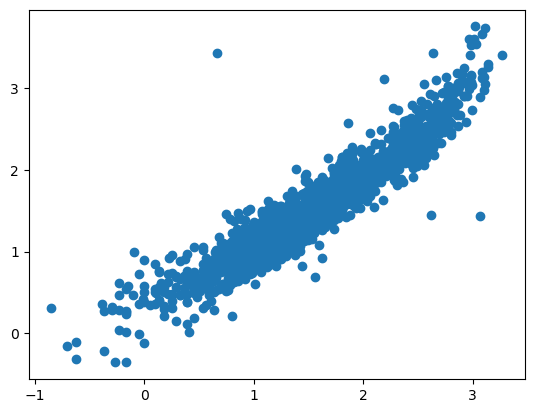

In [133]:
plt.scatter(y_test,y_pred)

In [134]:
mse_lr = metrics.mean_squared_error(y_test, y_pred)
mse_lr

0.053894792424205765

In [135]:
rmse_lr = metrics.mean_squared_error(y_test, y_pred,squared=False)
rmse_lr

0.2321525197455452

In [136]:
df_lr=df6.copy()

In [137]:
#df_reg=df_lr.drop(['Owner_Type','Mileage','Seats','Price','Kilometers_Driven'],axis=1)

In [138]:
df_reg=df_lr.drop(['Owner_Type','Seats','Price','Fuel_Type',"Transmission"],axis=1)

In [139]:
y=df6['Price']

In [140]:
df_reg.head()

,Mileage,Engine,Power,Location,Kilometers_Driven,Car_Make,car_age
0,26.60,998.0,58.16,9.0,72000,3.0,13
1,19.67,1582.0,126.20,7.0,41000,12.0,8
2,18.20,1199.0,88.70,8.0,46000,6.0,12
3,20.77,1248.0,88.76,8.0,87000,7.0,11
4,15.20,1968.0,140.80,15.0,40670,18.0,10


In [141]:
X_train,X_test,y_train,y_test = train_test_split(df_reg,y,test_size=0.3,random_state=42)

In [142]:
scaler = StandardScaler()

In [143]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [144]:
model = LinearRegression()

In [145]:
model.fit(X_train,y_train)

LinearRegression()

In [146]:
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

In [147]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.8558459649440441

In [148]:
r2 = metrics.r2_score(y_train, y_pred_train)
r2

0.8564936012602473

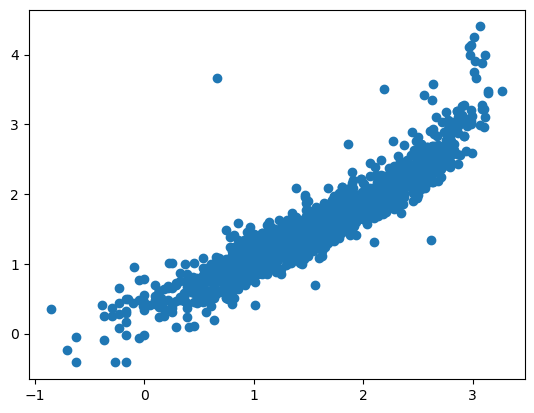

In [149]:
plt.scatter(y_test,y_pred)

In [150]:
mse_lr = metrics.mean_squared_error(y_test, y_pred)
mse_lr

0.06275000898744562

In [151]:
rmse_lr = metrics.mean_squared_error(y_test, y_pred,squared=False)
rmse_lr

0.2504995189365553

In [172]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,5,1)
n_estimators_range = np.arange(100,150,50)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range,max_depth=[1,2,3,4,5,6,7,8])

rf_regressor = RandomForestRegressor(n_jobs = -1)
grid_cv = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3)

grid_cv.fit(X_train,y_train)
print(grid_cv.score(X_test,y_test))
print(grid_cv.score(X_train,y_train))

0.9289705429375055
0.9578424003367771


In [153]:
y_pred=grid_cv.predict(X_test)

In [154]:
print(f"RMSE for Random Forest Regression is {metrics.mean_squared_error(y_test, y_pred,squared=False)}")

RMSE for Random Forest Regression is 0.1767794670497933


In [155]:
print(f"MSE for Random Forest Regression is {metrics.mean_squared_error(y_test, y_pred)}")

MSE for Random Forest Regression is 0.03125097997040895


In [171]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,8,1)
param_grid = dict(max_features=max_features_range,max_depth=[1,2,3,4,5,6,7])

dt_regressor = DecisionTreeRegressor()
grid_cv = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=10)

grid_cv.fit(X_train,y_train)
print(grid_cv.score(X_test,y_test))
print(grid_cv.score(X_train,y_train))

0.9060258565935093
0.9320139805232576


In [160]:
X_r = df6.drop(['Price'],axis=1)
y_r = df6['Price']

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X_r,y_r,test_size=0.3,random_state=42)

In [162]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=np.arange(0,1,0.01), cv=cv)

#fit model
model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [163]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.8761879428830928
0.883876598656926


In [164]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = LassoCV(alphas=np.arange(0,1,0.01), cv=cv)
#fit model
model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

C:\Users\ramit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ramit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.54795444857791, tolerance: 0.15658532111742737
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ramit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ramit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_de

0.0


C:\Users\ramit\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+02, tolerance: 1.737e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [165]:
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

0.8761888337257959
0.8838765993034703
